<a href="https://colab.research.google.com/github/GianmarcoAndreana/NNDL/blob/main/Perceptron_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####################
#wget file
####################
!wget https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip
!unzip breast+cancer+wisconsin+diagnostic.zip
!ls
#!cat wdbc.data
#!cat wdbc.names

--2025-02-25 20:24:03--  https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘breast+cancer+wisconsin+diagnostic.zip’

breast+cancer+wisco     [ <=>                ]  50.08K  --.-KB/s    in 0.03s   

2025-02-25 20:24:03 (1.40 MB/s) - ‘breast+cancer+wisconsin+diagnostic.zip’ saved [51284]

Archive:  breast+cancer+wisconsin+diagnostic.zip
  inflating: wdbc.data               
  inflating: wdbc.names              
breast+cancer+wisconsin+diagnostic.zip	sample_data  wdbc.data	wdbc.names


In [2]:
####################
#import to pandas
####################
import pandas as pd

# Load the dataset to inspect its contents
file_path = 'wdbc.data'
data = pd.read_csv(file_path, header=None)

# Assign column names based on the Breast Cancer Wisconsin dataset documentation
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data.columns = columns

# Display the first few rows to understand the structure
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
####################
#convert data to numpy
####################
import numpy as np

# Convert the diagnosis column into numerical values for plotting (M = 1, B = -1)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': -1})

# Extract features&labels from pandas df and convert to numpy arrays (.value)
X = data[['Feature_1', 'Feature_2']].values
y = data['Diagnosis'].values

#NOTE: X is a 569 x 2 matrix: a row per sample, a column per feature

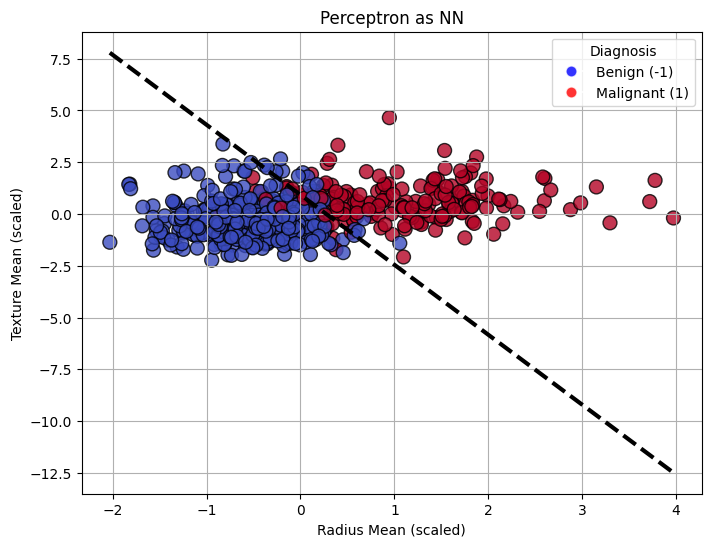

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define the Perceptron Model
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.tanh(self.linear(x))  # Activation function

# # Standardize the data (important for correct decision boundary)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Initialize model, loss, and optimizer
model = Perceptron(input_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Train perceptron
for epoch in range(50):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

# Extract learned weights and bias
w = model.linear.weight.data.numpy().flatten()
b = model.linear.bias.data.numpy()

# Plot the data
plt.figure(figsize=(8, 6))
# plt.scatter(X[y[:, 0] == 1][:, 0], X[y[:, 0] == 1][:, 1],  edgecolor="k", alpha=0.6, marker="o", label="Malign (+1)", s=100)
# plt.scatter(X[y[:, 0] == -1][:, 0], X[y[:, 0] == -1][:, 1], edgecolor="k", alpha=0.6, marker="o", label="Benign (-1)", s=100)
plt.scatter(
    X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.8, marker="o", s=100,
)
# Plot decision boundary
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = (-w[0] * x_boundary - b) / w[1]  # Compute y values

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', alpha = 0.8, markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', alpha = 0.8, markersize=8, label='Malignant (1)')
]
plt.legend(handles=handles, title='Diagnosis')

plt.plot(x_boundary, y_boundary, 'k--', lw=3, label="Decision Boundary")
plt.xlabel("Radius Mean (scaled)")
plt.ylabel("Texture Mean (scaled)")
plt.title("Perceptron as NN")
plt.grid(True)
plt.show()